# Importing Necessary Libraries

---



In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

#calculating cosinne simmilarity between users
from sklearn.metrics  import pairwise_distances
from scipy.spatial.distance import cosine, correlation

# Dataset

---



In [80]:
df=pd.read_csv("/content/book.csv", encoding = "ISO-8859-1")
df.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


# Problem Statement

---
* Build a recommender system by using cosine simillarties score.




# EDA

In [81]:
# making changes in columns' names

df.columns = df.columns.str.replace(".", "_")
df.columns.to_list()

['User_ID', 'Book_Title', 'Book_Rating']

In [82]:
df["Book_Title"] = df["Book_Title"].str.replace("[^a-zA-Z0-9 ]", "", regex=True).str.lower()
df["Book_Title"] = df["Book_Title"].str.replace("\s+", " ", regex=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [84]:
df.describe()

,User_ID,Book_Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [85]:
col=df.columns
col

Index(['User_ID', 'Book_Title', 'Book_Rating'], dtype='object')

In [86]:
df.isnull().sum()

User_ID        0
Book_Title     0
Book_Rating    0
dtype: int64

In [87]:
df.duplicated().sum()

2

In [88]:
df[df.duplicated()]

,User_ID,Book_Title,Book_Rating
5051,2152,le nouveau soleil de teur,7
7439,3757,the magicians tale,7


In [89]:
df=df.drop_duplicates()

In [90]:
for col in df:
    print(f'{col}: {df[col].unique()}')

User_ID: [276726 276729 276736 ... 162113 162121 162129]
Book_Title: ['classical mythology' 'clara callan' 'decision in normandy' ...
 'how to flirt a practical guide' 'twilight'
 'kids say the darndest things']
Book_Rating: [ 5  3  6  8  7 10  9  4  1  2]


In [91]:
# Unique Users and Products

print("Unique UserID count: %s" % str(df.User_ID.nunique()))
print("Unique Book count: %s" % str(df.Book_Title.nunique()))

Unique UserID count: 2182
Unique Book count: 9602


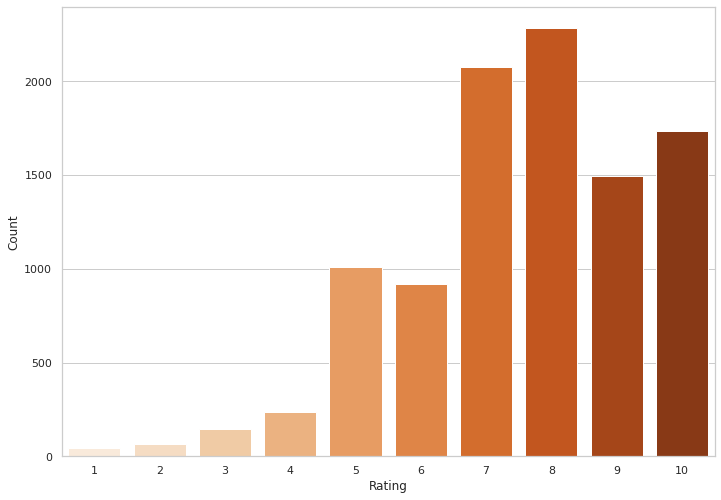

In [92]:
# Rating frequency

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.countplot(x='Book_Rating', data=df, palette='Oranges')
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

# Recommandation Engine

---



In [93]:
rating = pd.pivot_table(df, index='User_ID', values='Book_Rating', columns='Book_Title', fill_value=0)
rating

Book_Title,jason madison amp,other storiesmerril1985mcclelland amp,repairing pc drives amp,010100 a novel of the millennium,10 commandments of dating,100 great fantasy short short stories,1001 brilliant ways to checkmate,101 bright ideas esl activities for all ages,101 dalmatians,101 essential tips house plants,...,zen and the art of motorcycle maintenance an inquiry into values,zen in the art of archery vintage spiritual classics,zen meditations on being a mother zen meditations,zits unzipped sketchbook 5 scott jerry zits collection sketchbook no 5,zlateh the goat and other stories,zodiac the ecothriller,zombie,zombies of the gene pool,zoot suit and other plays,zora hurston and the chinaberry tree reading rainbow book
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
user_sim =1- pairwise_distances(rating.values,metric='cosine')

In [95]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
#Set the index and column names to user ids 
user_sim_df.index = df.User_ID.unique()
user_sim_df.columns = df.User_ID.unique()

In [97]:
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [98]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]


,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [99]:
#most similar user
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [100]:
df[(df['User_ID']==276729) | (df['User_ID']==276726)]

,User_ID,Book_Title,Book_Rating
0,276726,classical mythology,5
1,276729,clara callan,3
2,276729,decision in normandy,6


# Popularity Based Recommender System

---



In [101]:
num_rating_df = df.groupby('Book_Title').count()['Book_Rating'].reset_index()
num_rating_df.rename(columns={'Book_Rating':'num_ratings'},inplace=True)
num_rating_df

,Book_Title,num_ratings
0,jason madison amp,1
1,other storiesmerril1985mcclelland amp,1
2,repairing pc drives amp,1
3,010100 a novel of the millennium,1
4,10 commandments of dating,1
...,...,...
9597,zodiac the ecothriller,2
9598,zombie,1
9599,zombies of the gene pool,1
9600,zoot suit and other plays,1


In [102]:
avg_rating_df = df.groupby('Book_Title').mean()['Book_Rating'].reset_index()
avg_rating_df.rename(columns={'Book_Rating':'avg_ratings'},inplace=True)
#avg_rating_df.drop_duplicates(['Book_Title'], inplace=True)
avg_rating_df

,Book_Title,avg_ratings
0,jason madison amp,8.0
1,other storiesmerril1985mcclelland amp,6.0
2,repairing pc drives amp,4.0
3,010100 a novel of the millennium,10.0
4,10 commandments of dating,7.0
...,...,...
9597,zodiac the ecothriller,5.0
9598,zombie,8.0
9599,zombies of the gene pool,6.0
9600,zoot suit and other plays,9.0


In [103]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book_Title')
popular_df

,Book_Title,num_ratings,avg_ratings
0,jason madison amp,1,8.0
1,other storiesmerril1985mcclelland amp,1,6.0
2,repairing pc drives amp,1,4.0
3,010100 a novel of the millennium,1,10.0
4,10 commandments of dating,1,7.0
...,...,...,...
9597,zodiac the ecothriller,2,5.0
9598,zombie,1,8.0
9599,zombies of the gene pool,1,6.0
9600,zoot suit and other plays,1,9.0


In [104]:
popular_df = popular_df[popular_df['num_ratings']>=3].sort_values('avg_ratings',ascending=False).head(50)

In [105]:
popular_df = popular_df.merge(df,on='Book_Title').drop_duplicates('Book_Title')[['Book_Title','num_ratings','avg_ratings']]

In [106]:
popular_df

,Book_Title,num_ratings,avg_ratings
0,flesh and blood,3,9.333333
3,tis a memoir,3,9.000000
6,the face,3,9.000000
9,the subtle knife his dark materials book 2,4,8.750000
13,the hobbit or there and back again,3,8.666667
16,the golden compass his dark materials book 1,3,8.333333
19,the testament,3,8.333333
22,high fidelity,3,8.333333
25,the perfect storm a true story of men against ...,3,8.333333
28,the neverending story,3,8.333333


# Nearest Neighbors Algorithm

---



In [107]:
number_rating = df.groupby('Book_Title')['Book_Rating'].count().reset_index()
number_rating.rename(columns= {'Book_Rating':'number_of_ratings'}, inplace=True)
final_rating = df.merge(number_rating, on='Book_Title')
final_rating.shape
final_rating = final_rating[final_rating['number_of_ratings'] >= 2]
final_rating.drop_duplicates(['User_ID','Book_Title'], inplace=True)

In [108]:
book_pivot = final_rating.pivot_table(columns='User_ID', index='Book_Title', values="Book_Rating")
book_pivot.fillna(0, inplace=True)

In [109]:
#But here in the pivot table, we have lots of zero values and on clustering, this computing power will increase to calculate the distance of zero values
# so we will convert the pivot table to the sparse matrix and then feed it to the model.

from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [110]:
#Now we will train the nearest neighbors algorithm. 
#here we need to specify an algorithm which is brute means find the distance of every point to every other point.

from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute',metric = 'cosine')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [111]:
# creating random number for checking
random_no= np.random.choice(book_pivot.shape[0])
print(random_no)

99


In [112]:
#Let’s make a prediction and see whether it is suggesting books or not.
# we will find the nearest neighbors to the input book id and after that,
# we will print the top 5 books which are closer to those books. It will provide us distance and book id at that distance. 
#let us pass harry potter which is at 10 indexes.

distances, suggestions = model.kneighbors(book_pivot.iloc[random_no,:].values.reshape(1, -1), n_neighbors = 6)

In [113]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_pivot.index[random_no]))
    else:
        print('{0}: {1} ,with distance of {2}:'.format(i, book_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))

Recommendations for high fidelity:

1: fever pitch ,with distance of 0.2732476253327363:
2: the tipping point how little things can make a big difference ,with distance of 0.38714858696410437:
3: metamorphosis ,with distance of 0.42988853231103485:
4: the alienist ,with distance of 0.5793348231149884:
5: the beach ,with distance of 0.6123987335107925:


# Correlation Based on Recommenders (Book Based)

In [114]:
pivot = final_rating.pivot_table(columns='User_ID', index='Book_Title', values="Book_Rating")
pivot.fillna(0, inplace=True)
pivot.head()

User_ID,19,51,53,82,83,85,86,160,165,183,...,278636,278637,278648,278668,278675,278694,278715,278843,278844,278851
Book_Title,,,,,,,,,,,,,,,,,,,,,
1st to die a novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2061 odyssey three,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a bend in the road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a density of souls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
pivot = pivot.astype(np.int8)
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 1st to die a novel to zodiac the ecothriller
Columns: 415 entries, 19 to 278851
dtypes: int8(415)
memory usage: 145.4+ KB


In [116]:
# Let's look something similar to Pulp Fiction
rand_movie = 15

similar = pivot.corrwith(pivot[rand_movie:], drop=True).to_frame(name='PearsonR')
similar

,PearsonR
User_ID,
19,1.0
51,1.0
53,1.0
82,1.0
83,1.0
...,...
278694,1.0
278715,1.0
278843,1.0


In [117]:
number_rating = df.groupby('Book_Title')['Book_Rating'].count().reset_index()
number_rating.rename(columns= {'Book_Rating':'number_of_ratings'}, inplace=True)
final_rating = df.merge(number_rating, on='Book_Title')
final_rating.tail(5)

,User_ID,Book_Title,Book_Rating,number_of_ratings
9993,162121,american fried adventures of a happy eater,7,1
9994,162121,cannibal in manhattan,9,1
9995,162121,how to flirt a practical guide,7,1
9996,162121,twilight,8,1
9997,162129,kids say the darndest things,6,1


In [118]:
similar_sum = pd.merge(similar, final_rating, on='User_ID')
similar_sum.head()

,User_ID,PearsonR,Book_Title,Book_Rating,number_of_ratings
0,19,1.0,the murder book,7,2
1,51,1.0,watermelon,9,2
2,53,1.0,turning thirty,6,2
3,53,1.0,sick puppy,3,2
4,53,1.0,reliquary,10,1


In [119]:
#similar_sum = similar.join(final_rating['Book_Rating'])
similar_top10 = similar_sum[similar_sum['Book_Rating']>=3].sort_values(['PearsonR', 'Book_Rating'], 
                                                            ascending=[False, False]).head(11)

similar_top10[['Book_Title','Book_Rating']]                                                            

,Book_Title,Book_Rating
3407,pegasus in flight,10
3408,week by week guide to your pregnancy,10
3409,dr haggards disease vintage contemporaries,10
3420,temptress,10
3428,chicken soup for the christian family soul sto...,10
3431,devils dream,10
3432,the skylarks song a novel,10
3434,fathers day a novel,10
3435,sharpes devil,10
3448,the diary of mattie spenser,10


# SVD Matrix Factorization  [link text](https://www.kaggle.com/code/fazilbtopal/popular-recommender-system-algorithms)

In [120]:
from sklearn.decomposition import TruncatedSVD

X = pivot.T
SVD = TruncatedSVD(n_components=200, random_state=20)
SVD_matrix = SVD.fit_transform(X)

In [121]:
SVD.explained_variance_ratio_.sum()


0.9069227731584201

In [122]:
# We'll calculate the Pearson r correlation coefficient, 
# for every movie pair in the resultant matrix. With correlation being 
# based on similarities between user preferences.

corr_mat = np.corrcoef(SVD_matrix)
corr_mat.shape

(415, 415)

In [123]:
corr_mat


array([[ 1.00000000e+00, -1.91963207e-02,  1.42074881e-02, ...,
         1.26156229e-02,  9.81138201e-04,  4.39188040e-03],
       [-1.91963207e-02,  1.00000000e+00,  2.68764402e-02, ...,
        -1.06392532e-02, -1.30269115e-03, -1.07607113e-02],
       [ 1.42074881e-02,  2.68764402e-02,  1.00000000e+00, ...,
         1.97929375e-03,  2.35645778e-04, -3.58488301e-03],
       ...,
       [ 1.26156229e-02, -1.06392532e-02,  1.97929375e-03, ...,
         1.00000000e+00, -3.49627202e-05, -1.08301964e-03],
       [ 9.81138201e-04, -1.30269115e-03,  2.35645778e-04, ...,
        -3.49627202e-05,  1.00000000e+00,  1.58326175e-04],
       [ 4.39188040e-03, -1.07607113e-02, -3.58488301e-03, ...,
        -1.08301964e-03,  1.58326175e-04,  1.00000000e+00]])

In [124]:
rand_movie = 2

In [125]:
corr_pulp_fiction = corr_mat[rand_movie]

In [126]:
len(corr_pulp_fiction)

415

In [127]:
#corr_pulp_fiction = corr_mat[10,:]

# Recommending a Highly Correlated Movie.
# We will get different results due to decompression with svd
idx = X[(corr_pulp_fiction <= 1.0) & (corr_pulp_fiction > 0.5)].index
#df.loc[idx+1, 'Book_Title']

In [128]:
idx

Int64Index([53, 1996, 276847], dtype='int64', name='User_ID')

In [129]:
#df.loc[idx+1, 'Book_Title']

In [130]:
df.loc[2104,:]

User_ID        278536
Book_Title       1984
Book_Rating         7
Name: 2104, dtype: object

# Visualization

In [131]:
popular_df.head()

,Book_Title,num_ratings,avg_ratings
0,flesh and blood,3,9.333333
3,tis a memoir,3,9.000000
6,the face,3,9.000000
9,the subtle knife his dark materials book 2,4,8.750000
13,the hobbit or there and back again,3,8.666667


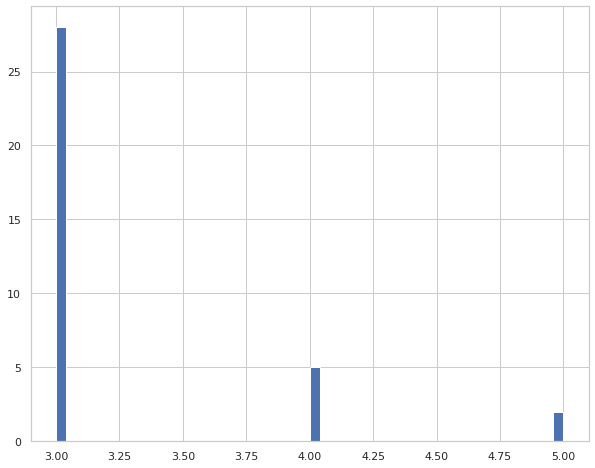

In [132]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
popular_df['num_ratings'].hist(bins=50)
plt.show()


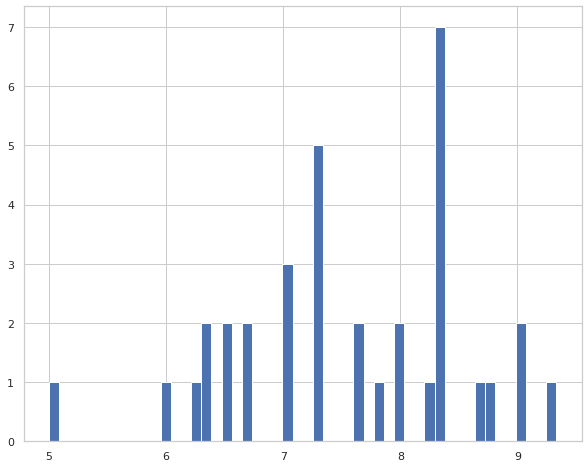

In [133]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
popular_df['avg_ratings'].hist(bins=50)
plt.show()

# Diffrent Algorithms

In [134]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
from surprise import Reader, Dataset, SVD #, evaluate

reader = Reader()


In [137]:
import surprise
from surprise.model_selection import train_test_split

In [138]:
reader = surprise.Reader(rating_scale=(1, 10))

In [139]:
df.columns

Index(['User_ID', 'Book_Title', 'Book_Rating'], dtype='object')

In [140]:
data = surprise.Dataset.load_from_df(df[['User_ID', 'Book_Title', 'Book_Rating']], reader)

In [141]:
trainset, testset = train_test_split(data, test_size=.20)

In [142]:
import surprise
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

In [143]:
benchmark = []

In [144]:
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [145]:
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,1.683885,8.178515,0.053852
SVD,1.687769,0.575521,0.035497
BaselineOnly,1.706339,0.035427,0.020169
KNNBaseline,1.709903,0.126314,0.064903
KNNWithMeans,1.819127,0.101137,0.068413
SlopeOne,1.820369,1.559244,0.029038
KNNBasic,1.823236,0.078742,0.028828
CoClustering,1.871412,1.044302,0.025369
NMF,1.919836,1.161243,0.023955


* SVDpp () algorithm gave us the best rmse, therefore, we will train and predict with SVDpp

In [146]:
algo = SVDpp()

In [147]:
algo.fit(trainset)

In [148]:
predictions = algo.test(testset)

In [149]:
from surprise import accuracy

In [150]:
accuracy.rmse(predictions, verbose=True)

RMSE: 1.6428


1.6427524360821704

In [151]:
df.columns

Index(['User_ID', 'Book_Title', 'Book_Rating'], dtype='object')

In [152]:
def recommendation(userID):
    user = df.copy()
    already_read = df[df['User_ID'] == userID]['Book_Title'].unique()
    user = user.reset_index()
    user = user[~user['Book_Title'].isin(already_read)]
    user['Estimate_Score']=user['Book_Title'].apply(lambda x: algo.predict(userID, x).est)
    #user = user.drop('title', axis = 1)
    user = user.sort_values('Estimate_Score', ascending=False).drop_duplicates('Book_Title', keep='first')
    print(user.head(10))

In [153]:
recommendation(75)

      index  User_ID                                         Book_Title  \
6762   6763     3538                                           the gift   
5669   5670     2520                                       tiger prince   
1722   1722   278202                something under the bed is drooling   
788     788   277427                                         2nd chance   
403     403   277087      divine secrets of the yaya sisterhood a novel   
1713   1713   278202                          the cat who played brahms   
2642   2642      243  blue latitudes boldly going where captain cook...   
1953   1953   278418                           the giver readers circle   
9602   9604   161974                                       another view   
2390   2390   278851           the years best horror stories series xiv   

      Book_Rating  Estimate_Score  
6762           10        7.882147  
5669           10        7.873093  
1722           10        7.853815  
788            10        7.785